# Find complex roots of an arbitrary function 

In [29]:
import numpy as np
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Lets consider function
$$
f(z, n) = z^n \log(z)
$$

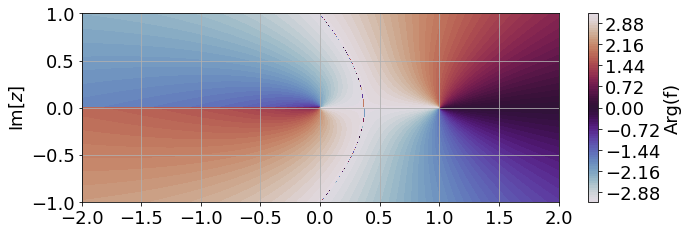

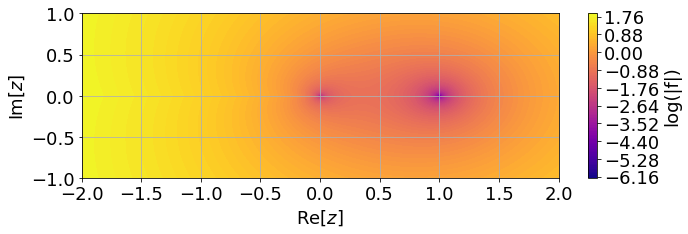

In [40]:
N = 700

z_re = np.linspace(-2, 2, num=N)
z_im = np.linspace(-1, 1, num=N)

X, Y = np.meshgrid(z_re, z_im)

def f(z, n):
    #return z**3
    return (z**n * np.log(z))

def df(z, n):
    return 3*z**2
    #return z**(n-1) * (1 + n*np.log(z))

n = 1
Z = f(X + 1j * Y, n)

ARG_Z = np.angle(Z)

#potolok = 15
#Z[np.log(np.abs(Z)) > potolok] = np.nan # np.exp(potolok)

plt.figure(figsize=(10, 3.6))
plt.contourf(z_re, z_im, ARG_Z, levels=100, cmap="twilight")
plt.colorbar(label="Arg(f)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[z]$")
#plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3.6))
plt.contourf(z_re, z_im, np.log(np.abs(Z)), levels=100, cmap="plasma")
plt.colorbar(label="log(|f|)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
plt.xlabel("$\operatorname{Re}[z]$")
plt.ylabel("$\operatorname{Im}[z]$")
#plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
ic(np.argmin(np.abs(Z)))
ic(np.min(np.abs(Z)))
ic(np.abs(Z[np.unravel_index(np.abs(Z).argmin(), Z.shape)]))


ic| np.argmin(np.abs(Z)): 244824
ic| np.min(np.abs(Z)): 0.0020217486811622354
ic| np.abs(Z[np.unravel_index(np.abs(Z).argmin(), Z.shape)]): 0.0020217486811622354


In [43]:
ic(X[np.unravel_index(np.abs(Z).argmin(), Z.shape)]);
ic(Y[np.unravel_index(np.abs(Z).argmin(), Z.shape)]);

ic| X[np.unravel_index(np.abs(Z).argmin(), Z.shape)]: 0.9985693848354793
ic| Y[np.unravel_index(np.abs(Z).argmin(), Z.shape)]: -0.0014306151645206988


In [41]:
Y.shape

In [119]:
def findRootRect(f, xRange, yRange, sizeLim=1e-3, numberOfDots=300):
    """
        brut force + np.argmin
    """
    xWidth = xRange[1] - xRange[0]
    yWidth = yRange[1] - yRange[0]
    
    z_re = np.linspace(xRange[0], xRange[1], num=numberOfDots)
    z_im = np.linspace(yRange[0], yRange[1], num=numberOfDots)

    X, Y = np.meshgrid(z_re, z_im)
    
    Z = f(X + 1j * Y)
    
    # index magic https://stackoverflow.com/a/3230123
    x0 = X[np.unravel_index(np.abs(Z).argmin(), Z.shape)]
    y0 = Y[np.unravel_index(np.abs(Z).argmin(), Z.shape)]
    z0 = complex(x0, y0)
    print(z0, "\t", np.abs(f(z0)))
    
    if sizeLim < np.sqrt(xWidth**2 + yWidth**2) * 0.5:
        xRangeNew = np.array([x0 - xWidth/4, x0 + xWidth/4])
        yRangeNew = np.array([y0 - yWidth/4, y0 + yWidth/4])
        
        return findRootRect(f, xRangeNew, yRangeNew, sizeLim=sizeLim, numberOfDots=numberOfDots)
    else:
        return z0, np.abs(f(z0))

In [120]:
xRange = (0.5, 1.5)
yRange = (-0.5, 0.5)
findRootRect(lambda z: f(z, n), xRange, yRange, sizeLim=1e-5, numberOfDots=30)

(0.9827586206896551-0.017241379310344862j) 	 0.02417375070754536
(0.9913793103448276+0.008620689655172376j) 	 0.012139063049841683
(0.9956896551724138+0.00431034482758616j) 	 0.0060826250763398445
(0.9978448275862069+0.0021551724137930522j) 	 0.0030445914914843325
(0.9989224137931034+0.0010775862068964984j) 	 0.0015231161636119247
(0.9994612068965517+0.0005387931034482214j) 	 0.0007617632702163076
(0.9997306034482758+0.00026939655172408296j) 	 0.00038093294264143
(0.9998653017241379+0.00013469827586201372j) 	 0.00019047929950396388
(0.999932650862069+6.73491379309791e-05j) 	 9.524285696003166e-05
(0.9999663254310345+3.36745689654618e-05j) 	 4.762223030227992e-05
(0.9999831627155172+1.6837284482703143e-05j) 	 2.381131560922362e-05
(0.9999915813577587+8.418642241323816e-06j) 	 1.190570791939524e-05
(0.9999957906788793+4.2093211206341524e-06j) 	 5.9528664884281275e-06
(0.9999978953394397+2.1046605602893206e-06j) 	 2.976436376347663e-06
(0.9999989476697199+1.0523302801169047e-06j) 	 1.4882

((0.999999868458715+1.3154128496604084e-07j), 1.860274569825807e-07)

In [101]:
f

<function __main__.f(z, n)>

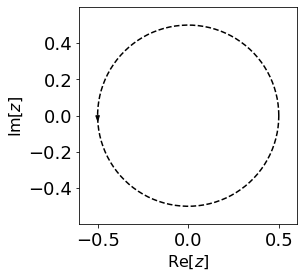

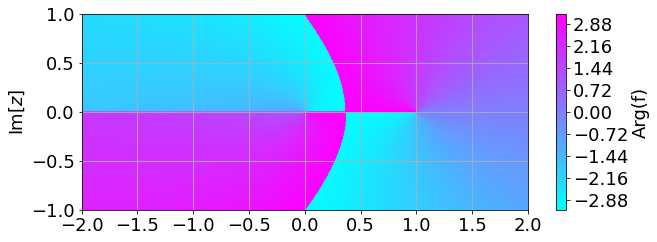

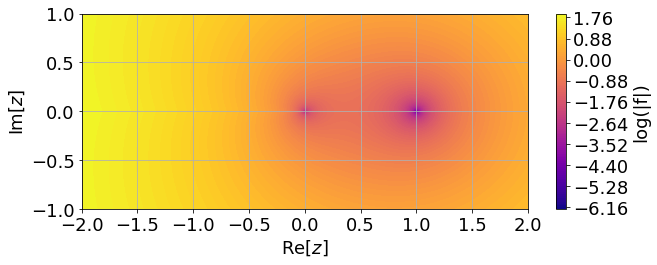

In [65]:
sector = Circle(0, 0.5)

roots = sector.roots(lambda z: f(z, n), lambda z: df(z, n))
roots.show()

zr = np.array(roots.roots)
zr = np.sort(zr)



# plot nicely
plt.figure(figsize=(10, 3.6))
plt.contourf(z_re, z_im, ARG_Z, levels=100, cmap="cool")
plt.colorbar(label="Arg(f)")
#plt.title(mode_type + " mode, " + particle_type + ", n = %d" % n)
#plt.xlabel("$\operatorname{Re}[k_n a]$")
plt.ylabel("$\operatorname{Im}[z]$")
#plt.yscale("log")
plt.grid()
#plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 3.6))
im = ax.contourf(z_re, z_im, np.log(np.abs(Z)), levels=100, cmap="plasma")
fig.colorbar(im, label="log(|f|)")
ax.scatter(np.real(zr), np.imag(zr), c="r")

for i in range(len(zr)):
    plt.annotate(
        "Root "+str(i), (np.real(zr[i]), np.imag(zr[i])), 
        c="w", size=20, path_effects=[pe.withStroke(linewidth=4, foreground="black")])

plt.xlabel("$\operatorname{Re}[z]$")
plt.ylabel("$\operatorname{Im}[z]$")
plt.grid()
#plt.tight_layout()
plt.show()

In [58]:
cxroots.IterativeMethods.newton(0, lambda z: f(z, n), lambda z: df(z, n))

<ipython-input-55-7532da654d19>:10: RuntimeWarning: divide by zero encountered in log
  return z**n * np.log(z)
<ipython-input-55-7532da654d19>:10: RuntimeWarning: invalid value encountered in double_scalars
  return z**n * np.log(z)


In [20]:
sector = Circle(0, 0.5)

roots = sector.roots(lambda z: f(z, n), lambda z: df(z, n))
roots.show()

RuntimeError: 
            Integration along the initial contour has failed.
            There is likely a root on or close to the initial contour.
            Try changing the initial contour, if possible.